<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>

<h5 align="center"><font size="5">By:<br><br> Sayeda Fatima</font></h5>


<div class="alert alert-block alert-info">
<H4>
In this notebook we try to practice all the classification algorithms that we have learned in this course.<br>

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.<br>

Let's first load required libraries:
</H4></div>

In [1]:
import itertools
import pandas as pd
import numpy as np
from sklearn import preprocessing

# K Neighbour Modules
from sklearn.model_selection import train_test_split # For Splitting Data
from sklearn.neighbors import KNeighborsClassifier   # For fitting & training KNN model 

# Decision Tree Modules
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import graphviz 
import pydotplus

# Support Vector Machine Modules
from sklearn import svm 

# Logistic Regression Modules
from sklearn.linear_model import LogisticRegression 

# Reporting Modules
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

# Visualization Modules
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline

### About dataset
<div class="alert alert-block alert-success">
<H4>
This dataset is about past loans.<br> 
The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted.<br>
It includes following fields:
</H4></div>

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

<div class="alert alert-block alert-warning">
<H5>
Let's download the dataset from CSV File
</H5></div>

In [2]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv'
df=pd.read_csv(file_name)
print(df.head(3))
#df.head()
df.shape


   Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30       9/8/2016   
1           2             2     PAIDOFF       1000     30       9/8/2016   
2           3             3     PAIDOFF       1000     15       9/8/2016   

    due_date  age             education  Gender  
0  10/7/2016   45  High School or Below    male  
1  10/7/2016   33              Bechalor  female  
2  9/22/2016   27               college    male  


(346, 10)

<div class="alert alert-block alert-warning">
<H5>
Convert Columns with Date to Date-Time Object
</H5></div>

In [3]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
print(df.head(3))

   Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30     2016-09-08   
1           2             2     PAIDOFF       1000     30     2016-09-08   
2           3             3     PAIDOFF       1000     15     2016-09-08   

    due_date  age             education  Gender  
0 2016-10-07   45  High School or Below    male  
1 2016-10-07   33              Bechalor  female  
2 2016-09-22   27               college    male  


# Data visualization and pre-processing
<div class="alert alert-block alert-warning">
<H5>
Let’s see how many of each class are there in selected data set columns
</H5></div>

In [4]:
print("loan status:\n",df['loan_status'].value_counts(),"\n\n")
print("Gender:\n",df['Gender'].value_counts(),"\n\n")
print("education:\n",df['education'].value_counts())

loan status:
 PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64 


Gender:
 male      294
female     52
Name: Gender, dtype: int64 


education:
 High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64


260 people have paid off the loan on time while 86 have gone into collection <br>
There are two classes of Gender <br>
There are four classes of education <br>

# Pre-processing:  Feature selection/extraction

<div class="alert alert-block alert-warning">
<H5>
Let's plot some columns to understand data better:<br><br>

1) Let's visualize 'loan status' of 'Principal'amount  made by the two 'Gender', 
</H5></div>

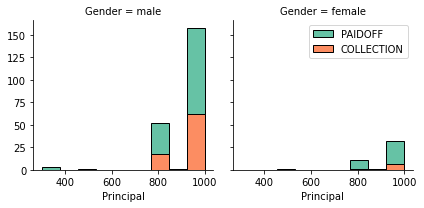

In [5]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10) # Bin Column 'Principal'
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2) # Set 'Gender' as bars
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

<div class="alert alert-block alert-warning">
<H5>
2) Now, let us also explore the impact of 'age' on 'loan status' for the two 'Gender', 
</H5></div>

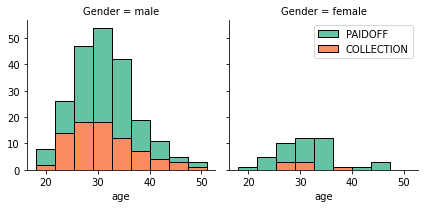

In [6]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

<div class="alert alert-block alert-warning">
<H5>
3) How about education <br><br>
Let's see if there is any impact of 'age' and 'education' on 'loan status'
</H5></div>

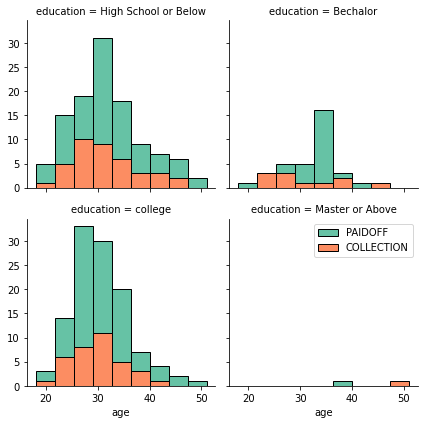

In [7]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="education", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

#### We see that people with education'Master or Above' are indifferent, so we will drop this group later

<div class="alert alert-block alert-warning">
<H5>
4) Using Column 'effective_date'; let us also look at the day of the week people get the loan
</H5></div>

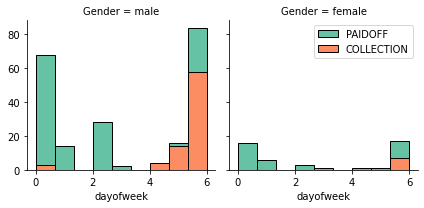

In [8]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

<H4>
We see that people who get the loan at the end of the week don't pay it off, <br><br>
so let's use Feature binarization to set a threshold value greater than day 3
</H4>

In [9]:
#df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
#df.head()

## Convert Categorical Features Explored Above to Numerical Values

<div class="alert alert-block alert-warning">
<H5>
1) Because Gender seems to have significant impact, let's explore it further
</H5></div>


In [10]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

<H4>
We can see that 86% of female pay their loans while only 73 % of males pay their loans <br><br>

Now, let's convert male to 0 and female to 1:
</H4>

In [11]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head(3)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3


<div class="alert alert-block alert-warning">
<H5>
3) Because education seems to have a significant impact, let's explore it further
</H5></div>

In [12]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### We again see that people with education'Master or Above' are indifferent, so we will drop this group later  (or we can drop these rows from dataframe)

<div class="alert alert-block alert-warning">
<H5>
4) Because 'dayofweek' seems to have a significant impact, let's explore it further
</H5></div>

In [13]:
df.groupby(['dayofweek'])['loan_status'].value_counts(normalize=True)

dayofweek  loan_status
0          PAIDOFF        0.965517
           COLLECTION     0.034483
1          PAIDOFF        1.000000
2          PAIDOFF        1.000000
3          PAIDOFF        1.000000
4          COLLECTION     0.500000
           PAIDOFF        0.500000
5          PAIDOFF        0.548387
           COLLECTION     0.451613
6          PAIDOFF        0.608434
           COLLECTION     0.391566
Name: loan_status, dtype: float64

<H4>
We see that people who get the loan at the end of the week don't pay it off. <br><br>
So, let's use Feature binarization to set a threshold value greater than day 3 
in a new column 'weekend'
</H4>

In [14]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding 
<div class="alert alert-block alert-warning">
<H5>
Many machine learning algorithms cannot operate on label data directly. <br>
They require all input variables and output variables to be numeric. <br>
For categorical variables where no such ordinal relationship exists, the integer encoding is not enough. <br>
In this case, a one-hot encoding can be applied to the integer representation. 
</H5></div>

#### Select Important Features before One Hot Encoding

In [15]:
df[['Principal','terms','age','Gender','weekend','education']].head()

,Principal,terms,age,Gender,weekend,education
0,1000,30,45,0,0,High School or Below
1,1000,30,33,1,0,Bechalor
2,1000,15,27,0,0,college
3,1000,30,28,1,1,college
4,1000,30,29,0,1,college



#### We will now use one hot encoding technique to conver categorical varables to binary variables
#### after which we will append them to the 'Feature' Data Frame


In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True) # Because this group is indefferent, as seen above
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection
<div class="alert alert-block alert-warning">
<H5>
Let's define 'Feature' as set, 'X':
</H5></div>

In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


<div class="alert alert-block alert-warning">
<H5>
Let's define our Labels
</H5></div>

In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data
<div class="alert alert-block alert-warning">
<H5>
Data Standardization give data zero mean and unit variance (technically should be done after train test split)
</H5></div>

In [19]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification
<div class="alert alert-block alert-danger">
<H4>
Now, it is your turn, use the training set to build an accurate model. <br>
Then use the test set to report the accuracy of the model <br><br>
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.
</H4></div>

# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.

<div class="alert alert-block alert-success">
<H6>

K in KNN, is the number of nearest neighbors to examine. <br> 
It is supposed to be specified by the user. <br> 
So, how can we choose right value for K? <br> 
The general solution is to reserve a part of your data for testing the accuracy of the model. <br>  
Then choose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. <br>  
Repeat this process, increasing the k, and see which k is the best for your model. <br> 
We can calculate the accuracy of KNN for different values of k.

</H6></div>

##### Because we can split our train_loan.csv into train and test to find the best k.
##### So, we Split Feature X above {which has selected loan.csv columns} into Train Set & Test Set:

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print("Train set: ", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)

Train set:  (276, 8) (276,)
Test set:  (70, 8) (70,)


##### Now fit the model and measure accuracy

In [21]:
k = 12
mean_acc = np.zeros((k-1))
std_acc = np.zeros((k-1))

#We fit the model:
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
kNN_model
y_pred = kNN_model.predict( X_test )

#Find the max value
accuracies = {}
k_max = 1
acc_max = 0
for k in range(1, 6): # No of rows to print
    kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred = kNN_model.predict( X_test ) #yhat
    
    mean_acc[k-1] = metrics.accuracy_score(y_test, y_pred)    
    std_acc[k-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])
    
    accuracies[k] = accuracy_score(y_test, y_pred)
    print(k, accuracies[k])

1 0.6714285714285714
2 0.6571428571428571
3 0.7142857142857143
4 0.6857142857142857
5 0.7571428571428571


In [22]:
k = 12
mean_acc = np.zeros((k-1))
std_acc = np.zeros((k-1))

for n in range(1,k):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    #print(k, mean_acc[k])
mean_acc

array([0.67142857, 0.65714286, 0.71428571, 0.68571429, 0.75714286,
       0.71428571, 0.78571429, 0.75714286, 0.75714286, 0.67142857,
       0.7       ])

<div class="alert alert-block alert-warning">
<H5>
Let's plot the k value with Best Accuracy Score 
</H5></div>


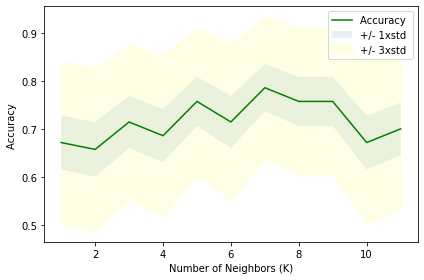

The best accuracy was  0.7857142857142857 with k= 7


In [23]:
plt.plot(range(1,k),mean_acc,'g')
plt.fill_between(range(1,k),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,k),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="yellow")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
plt.show()
print( "The best accuracy was ", mean_acc.max(), "with k=", mean_acc.argmax()+1) 


<div class="alert alert-block alert-warning">
<H5>
Now, Fit & Train the model with k value with Best Jaccard & F1 Accuracy Score 
</H5></div>

In [24]:
#Training the model
knn_model = KNeighborsClassifier(n_neighbors=mean_acc.argmax()+1).fit(X_train, y_train)
print("Train set Accuracy (Jaccard): ", metrics.accuracy_score(y_train, knn_model.predict(X_train)))
print("Test set Accuracy (Jaccard): ", metrics.accuracy_score(y_test, knn_model.predict(X_test)))

print("Train set Accuracy (F1): ", f1_score(y_train, knn_model.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, knn_model.predict(X_test), average='weighted'))

Train set Accuracy (Jaccard):  0.8079710144927537
Test set Accuracy (Jaccard):  0.7857142857142857
Train set Accuracy (F1):  0.8000194668761034
Test set Accuracy (F1):  0.7766540244416351


# Decision Tree
<div class="alert alert-block alert-success">
<H5>

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute <br>
(e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, <br>
and each leaf node represents a class label (decision taken after computing all attributes). <br> <br>

To make a Decision Tre: <br>
1) First, choose an attribute from our dataset. <br>
2) Calculate the significance of the attribute in the splitting of the data. <br>
3) Split the data based on the value of the best attribute, <br>
4) Then, go to each branch and repeat it for the rest of the attributes. 

</H5></div>

In [25]:
from sklearn.tree import DecisionTreeClassifier
for d in range(1,10):
    dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = d).fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    print(d, accuracy_score(y_test, y_pred))
    

1 0.7857142857142857
2 0.7857142857142857
3 0.6142857142857143
4 0.6142857142857143
5 0.6428571428571429
6 0.7714285714285715
7 0.7571428571428571
8 0.7571428571428571
9 0.6571428571428571


<div class="alert alert-block alert-warning">
<H5>
Tree depth is a measure of how many splits a tree can make before coming to a prediction.<br><br>
Now, Fit the model with desired Tree Depth and & Train with Best Jaccard & F1 Accuracy Scores 
</H5></div>

In [26]:
print("We take depth = 2")
dt = DecisionTreeClassifier(criterion="entropy", max_depth=2).fit(X_train, y_train)

print("Train set Accuracy (Jaccard): ", metrics.accuracy_score(y_train, dt.predict(X_train)))
print("Test set Accuracy (Jaccard): ", metrics.accuracy_score(y_test, dt.predict(X_test)))

print("Train set Accuracy (F1): ", f1_score(y_train, dt.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, dt.predict(X_test), average='weighted'))


We take depth = 2
Train set Accuracy (Jaccard):  0.7427536231884058
Test set Accuracy (Jaccard):  0.7857142857142857
Train set Accuracy (F1):  0.6331163939859591
Test set Accuracy (F1):  0.6914285714285714


<div class="alert alert-block alert-warning">
<H5>
Now, Visualize Decision Tree
</H5></div>

# Support Vector Machine

<div class="alert alert-block alert-success">
<H5>
A Support Vector Machine is a supervised algorithm that can classify cases by finding a separator. <br>
Basically, SVMs are based on the idea of finding a hyperplane that best divides a data set into two classes <br>
So the goal is to choose a hyperplane with as big a margin as possible. <br><br> 

SVM works by first mapping data to a high dimensional feature space so that data points <br> 
can be categorized, even when the data are not otherwise linearly separable. <br> 
Then, a separator is estimated for the data. <br>
The data should be transformed in such a way that a separator could be drawn as a hyperplane. <br><br>

This mapping of data into a higher-dimensional space is called, kernelling.  <br>
The mathematical function used for the transformation is known as the kernel function, <br>
and can be of different types, such as:  <br>
1) linear <br>
2) polynomial <br>
3) Radial Basis Function,or RBF, and <br>
4) sigmoid. <br><br>

There are many ways to choose best kernelling method:
1) The F1 score: <br>
The F1 score is calculated based on the precision and recall of each class. <br> 
It is the weighted average of the Precision and the recall scores. <br> 
The F1 score reaches its perfect value at one and worst at 0. <br> 
It is a very good way to show that a classifies has a good recall and precision values. <br>
Hence, we will choose a classifier with highest F1 Score. <br>

2) The Jaccard index: <br>
The idea behind this index is that higher the similarity of these two groups the higher the index. <br>
Hence, the higher the score, the better the model. <br>

Source: https://towardsdatascience.com/common-classification-model-evaluation-metrics-2ba0a7a7436e

</H5></div>

#### Evaluate Best Kernelling Method

In [27]:
for k in ('linear', 'poly', 'rbf','sigmoid'):
    svm_model = svm.SVC( kernel = k).fit(X_train,y_train)
    svm_yhat = svm_model.predict(X_test)
    print("For kernel: {}, the f1 score is: {}".format(k,f1_score(y_test,svm_yhat, average='weighted')))

For kernel: linear, the f1 score is: 0.6914285714285714
For kernel: poly, the f1 score is: 0.7064793130366899
For kernel: rbf, the f1 score is: 0.7275882012724117
For kernel: sigmoid, the f1 score is: 0.6892857142857144


<div class="alert alert-block alert-warning">
<H5>
Now, use the Best Kernelling Method, Fit & Train the model with Best Jaccard & F1 Accuracy Score 
</H5></div>

In [28]:
print("Because The F1 score reaches its perfect value at one and worst at 0, \n So we choose rbf")
svm_model = svm.SVC( kernel = 'rbf').fit(X_train,y_train)

print("Train set Accuracy (Jaccard): ", metrics.accuracy_score(y_train, svm_model.predict(X_train)))
print("Test set Accuracy (Jaccard): ", metrics.accuracy_score(y_test, svm_model.predict(X_test)))

print("Train set Accuracy (F1): ", f1_score(y_train, svm_model.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, svm_model.predict(X_test), average='weighted'))

Because The F1 score reaches its perfect value at one and worst at 0, 
 So we choose rbf
Train set Accuracy (Jaccard):  0.782608695652174
Test set Accuracy (Jaccard):  0.7428571428571429
Train set Accuracy (F1):  0.7682165861513688
Test set Accuracy (F1):  0.7275882012724117


# Logistic Regression
<div class="alert alert-block alert-success">
<H5>
Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables.<br>
Since the outcome is a probability, the dependent variable is bounded between 0 and 1.
</H5></div>
<div class="alert alert-block alert-warning">
<H5>
Evaluating Best Kernelling Method
</H5></div>

In [29]:
for k in ('lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag'):
    lr_model = LogisticRegression(C = 0.01, solver = k).fit(X_train, y_train)
    lr_yhat = lr_model.predict(X_test)
    y_prob = lr_model.predict_proba(X_test)
    print('When Solver is {}, logloss is : {}'.format(k, log_loss(y_test, y_prob)))

When Solver is lbfgs, logloss is : 0.4920179847937498
When Solver is saga, logloss is : 0.49201775290701477
When Solver is liblinear, logloss is : 0.5772287609479654
When Solver is newton-cg, logloss is : 0.492017801467927
When Solver is sag, logloss is : 0.4920083053846423


<div class="alert alert-block alert-warning">
<H5>
Now, use the Best Kernelling Method, Fit & Train the model with Best Jaccard & F1 Accuracy Score 
</H5></div>

###### Because the goal of LRM is to choose a hyperplane with as big a margin as possible, \n So we choose liblinear"

In [30]:
k = 'liblinear'
lr_model = LogisticRegression(C = 0.01, solver = k).fit(X_train, y_train)

print("Train set Accuracy (Jaccard): ", metrics.accuracy_score(y_train, lr_model.predict(X_train)))
print("Test set Accuracy (Jaccard): ", metrics.accuracy_score(y_test, lr_model.predict(X_test)))

print("Train set Accuracy (F1): ", f1_score(y_train, lr_model.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, lr_model.predict(X_test), average='weighted'))

Train set Accuracy (Jaccard):  0.7572463768115942
Test set Accuracy (Jaccard):  0.6857142857142857
Train set Accuracy (F1):  0.7341146337750953
Test set Accuracy (F1):  0.6670522459996144


# Model Evaluation using Test set

<div class="alert alert-block alert-warning">
<H5>
We will now download and load the test set file:
</H5></div>

In [31]:
test_file_name= 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv'
test_df=pd.read_csv(test_file_name)
print(test_df.head(3))
#df.head()
test_df.shape

   Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           1             1     PAIDOFF       1000     30       9/8/2016   
1           5             5     PAIDOFF        300      7       9/9/2016   
2          21            21     PAIDOFF       1000     30      9/10/2016   

    due_date  age             education  Gender  
0  10/7/2016   50              Bechalor  female  
1  9/15/2016   35       Master or Above    male  
2  10/9/2016   43  High School or Below  female  


(54, 10)

<div class="alert alert-block alert-warning">
<H5>
Convert Columns with Date to Date-Time Object
</H5></div>

In [32]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
print(test_df.head(3))

   Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           1             1     PAIDOFF       1000     30     2016-09-08   
1           5             5     PAIDOFF        300      7     2016-09-09   
2          21            21     PAIDOFF       1000     30     2016-09-10   

    due_date  age             education  Gender  dayofweek  
0 2016-10-07   50              Bechalor  female          3  
1 2016-09-15   35       Master or Above    male          4  
2 2016-10-09   43  High School or Below  female          5  


<div class="alert alert-block alert-warning">
<H5>
<br>    
We saw that people who get the loan at the end of the week don't pay it off. <br>
So, will use Feature binarization to set a threshold value greater than day 3 in a new column 'weekend'<br><br>
    
We will convert male to 0 and female to 1 <br><br>
    
We will use selected Features above as Features1 & will employ one hot encoding technique to convert <br>
categorical variables to binary variables after which we will append them to the 'Feature1' Data Frame <br><br>

We saw that people with education'Master or Above' are indifferent, so we will drop this group from test data


</H5></div>

In [33]:
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

Feature1 = test_df[['Principal','terms','age','Gender','weekend']]
Feature1 = pd.concat([Feature1,pd.get_dummies(test_df['education'])], axis=1)  # Because this group is indefferent, as seen above

Feature1.drop(['Master or Above'], axis = 1,inplace=True)

<div class="alert alert-block alert-warning">
<H5>
We will now normalize the test data <br><br>
And Target Results
</H5></div>

In [34]:
# Normalizing Test Data
x_loan_test = Feature1
x_loan_test = preprocessing.StandardScaler().fit(x_loan_test).transform(x_loan_test) # Normalize Test

#Targeting Results
y_loan_test = test_df['loan_status'].values

<div class="alert alert-block alert-warning">
<H5>
We will now perform Jaccard Test
</H5></div>

In [35]:
#jaccard list:
knn_pred = kNN_model.predict(x_loan_test)
j1 = accuracy_score(y_loan_test, knn_pred)

dt_pred = dt.predict(x_loan_test)
j2 = accuracy_score(y_loan_test, dt_pred)

svm_pred = svm_model.predict(x_loan_test)
j3 = accuracy_score(y_loan_test, svm_pred)

lr_pred = lr_model.predict(x_loan_test)
j4 = accuracy_score(y_loan_test, lr_pred)

jaccard = [j1, j2, j3, j4]
jaccard

[0.7037037037037037,
 0.7407407407407407,
 0.7962962962962963,
 0.7407407407407407]

<div class="alert alert-block alert-warning">
<H5>
We will now perform F1 Test
</H5></div>

In [36]:
knn_pred = kNN_model.predict(x_loan_test)
f1 = f1_score(y_loan_test, knn_pred, average='weighted')

dt_pred = dt.predict(x_loan_test)
f2 = f1_score(y_loan_test, dt_pred, average='weighted')


svm_pred = svm_model.predict(x_loan_test)
f3 = f1_score(y_loan_test, svm_pred, average='weighted')

lr_pred = lr_model.predict(x_loan_test)
f4 = f1_score(y_loan_test, lr_pred, average='weighted')

f1s = [f1, f2, f3, f4]
f1s

[0.6736355806123249,
 0.6304176516942475,
 0.7583503077293734,
 0.6604267310789049]

<div class="alert alert-block alert-warning">
<H5>
We will now calculate Log Loss
</H5></div>

In [37]:
from sklearn.metrics import log_loss

lr_pred = lr_model.predict_proba(x_loan_test)
aux = log_loss(y_loan_test, lr_pred)

log_loss = ['N/A','N/A','N/A', aux]
log_loss


['N/A', 'N/A', 'N/A', 0.5672153379912981]

<div class="alert alert-block alert-danger">
<H2>
REPORT
</H2></div>
<div class="alert alert-block alert-warning">
<H5>
We will transfer calculated scores in a dataframe to form a report
</H5></div>

In [38]:
index   = ["KNN", "Decision Tree", "SVM", "Logistic Regression"]
colunms = ["Jaccard", "F1-score", "LogLoss"]

data = [jaccard, f1s, log_loss]
data = np.array(data).T

df = pd.DataFrame(data, index=index, columns=colunms)

print(u"\u001b[34;5m \n                         REPORTING MODEL ACCURACY")
df

 
                         REPORTING MODEL ACCURACY


,Jaccard,F1-score,LogLoss
KNN,0.7037037037037037,0.6736355806123249,N/A
Decision Tree,0.7407407407407407,0.6304176516942475,N/A
SVM,0.7962962962962963,0.7583503077293734,N/A
Logistic Regression,0.7407407407407407,0.6604267310789049,0.5672153379912981
